S&P 500 ANOMALY DETECTION USING LSTM AUTOENCODER
Tensorflow version: 2.19.0

STEP 1: LOADING DATA
Dataset loaded successfully!
Total records: 8192
Date range: 1986-01-02 00:00:00 to 2018-06-29 00:00:00

First 5 rows of the dataset:
        date   close
0 1986-01-02  209.59
1 1986-01-03  210.88
2 1986-01-06  210.65
3 1986-01-07  213.80
4 1986-01-08  207.97

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8192 entries, 0 to 8191
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    8192 non-null   datetime64[ns]
 1   close   8192 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 128.1 KB
None

STEP 2: EXPLORATORY DATA ANALYSIS


Interactive plot displayed!

STEP 3: TRAIN-TEST SPLIT
Training set size: 6553 samples (80.0%)
Testing set size:  1639 samples (20.0%)
Training date range: 1986-01-02 00:00:00 to 2011-12-22 00:00:00
Testing date range:  2011-12-23 00:00:00 to 2018-06-29 00:00:00

STEP 4: DATA NORMALIZATION
Data normalized using StandardScaler
Training data - Mean: 0.0000, Std: 1.0001
Testing data  - Mean: 2.7393, Std: 0.9576

STEP 5: CREATING TIME SEQUENCES
Time steps (window size): 30
Training sequences shape: (6523, 30, 1)
  - Number of sequences: 6523
  - Time steps per sequence: 30
  - Features per time step: 1
Testing sequences shape: (1609, 30, 1)

STEP 6: BUILDING LSTM AUTOENCODER MODEL

Model Architecture:
────────────────────────────────────────────────────────────────────────────────


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 128)            │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ repeat_vector (RepeatVector)    │ (None, 30, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 30, 128)        │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 30, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed                │ (None, 30, 1)          │           129 │
│ (TimeDistributed)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 198,273 (774.50 KB)

 Trainable params: 198,273 (774.50 KB)

 Non-trainable params: 0 (0.00 B)

────────────────────────────────────────────────────────────────────────────────

Key Components:
  • Encoder: Compresses 30 time steps into a single representation
  • Decoder: Reconstructs the original 30 time steps
  • Logic: Normal data → Low reconstruction error
           Anomalous data → High reconstruction error

STEP 7: TRAINING THE MODEL
Starting model training...
Configuration:
  • Epochs: 100 (with early stopping)
  • Batch size: 32
  • Validation split: 10%
  • Early stopping patience: 3 epochs

Epoch 1/100
184/184 ━━━━━━━━━━━━━━━━━━━━ 16s 68ms/step - loss: 0.2490 - val_loss: 0.1531
Epoch 2/100
184/184 ━━━━━━━━━━━━━━━━━━━━ 12s 67ms/step - loss: 0.1750 - val_loss: 0.0984
Epoch 3/100
184/184 ━━━━━━━━━━━━━━━━━━━━ 20s 65ms/step - loss: 0.1356 - val_loss: 0.0919
Epoch 4/100
184/184 ━━━━━━━━━━━━━━━━━━━━ 12s 63ms/step - loss: 0.1138 - val_loss: 0.0854
Epoch 5/100
184/184 ━━━━━━━━━━━━━━━━━━━━ 14s 79ms/step - loss: 0.1120 - val_loss: 0.0862
Epoch 6/100
184/184 ━━━━━━━━━━━━━━━━━━━━ 


Training completed!

STEP 8: SAVING THE MODEL
✓ Model saved as: anomaly_model.h5

STEP 9: VISUALIZING TRAINING HISTORY
✓ Saved: training_history.jpg


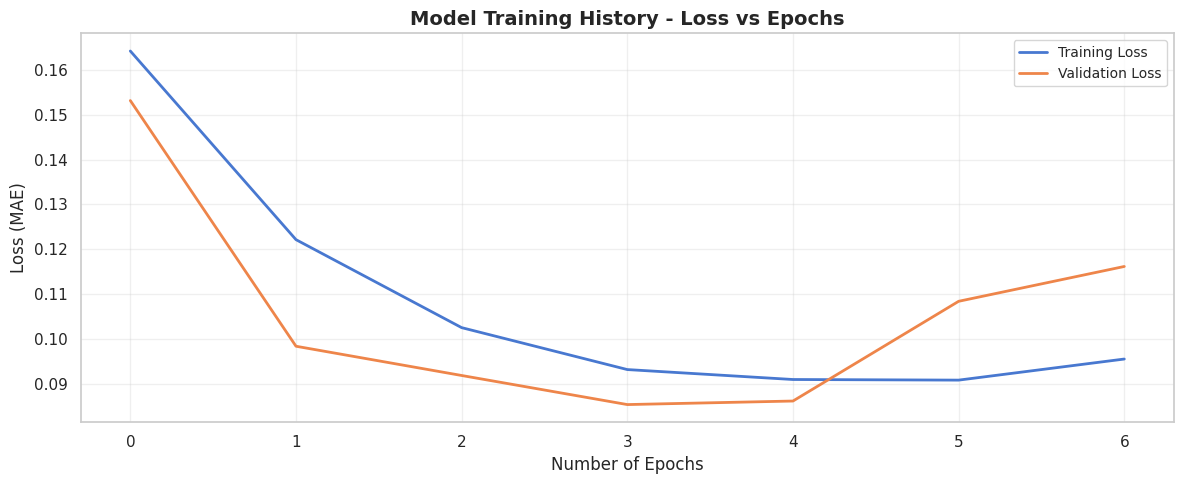

Final training loss: 0.095579
Final validation loss: 0.116185

STEP 10: ANALYZING TRAINING LOSS DISTRIBUTION
Calculating reconstruction errors on training data...
Training reconstruction error statistics:
  • Mean:   0.188012
  • Median: 0.173960
  • Std:    0.113174
  • Min:    0.015048
  • Max:    0.466831
  • 95th percentile: 0.380534

✓ Saved: training_error_distribution.jpg


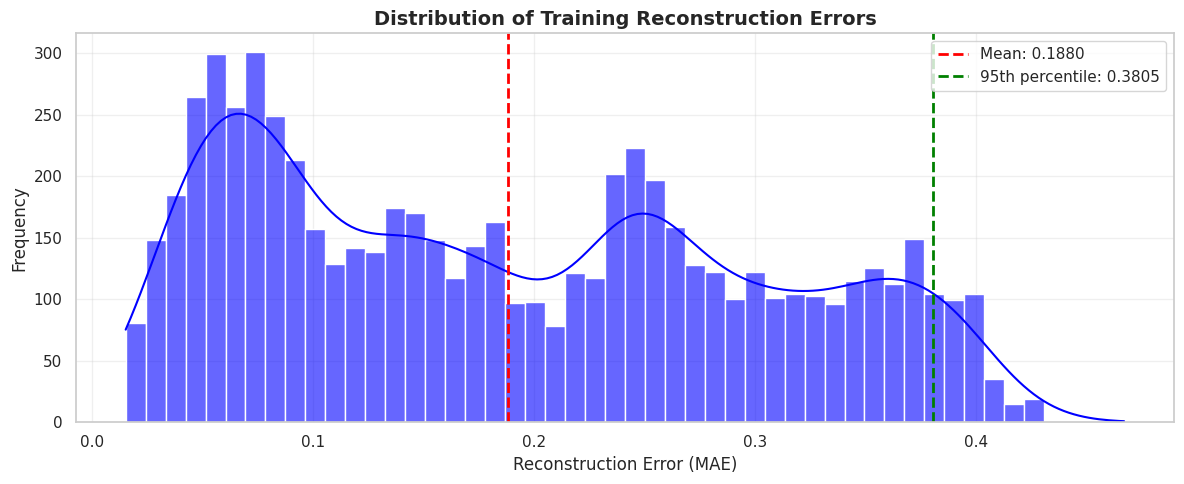

STEP 11: SETTING ANOMALY THRESHOLD
Anomaly detection threshold: 0.65
Logic: If reconstruction error > 0.65 → ANOMALY
       If reconstruction error ≤ 0.65 → NORMAL

STEP 12: DETECTING ANOMALIES ON TEST DATA
Calculating reconstruction errors on test data...
Test reconstruction error statistics:
  • Mean:   0.781218
  • Median: 0.780127
  • Std:    0.468491
  • Min:    0.061083
  • Max:    1.929563

✓ Saved: test_error_distribution.jpg


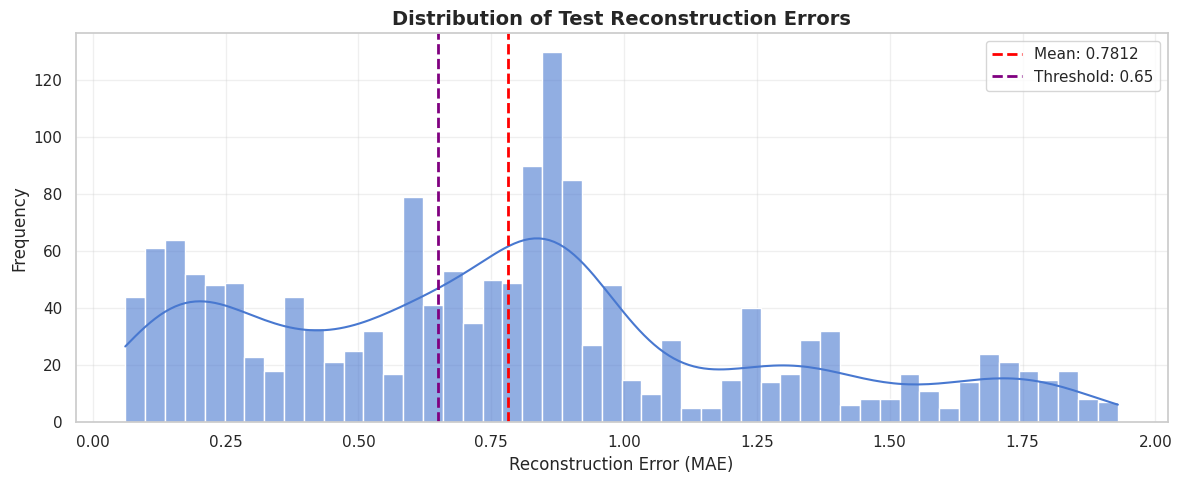

STEP 13: CREATING ANOMALY DETECTION RESULTS
Anomaly Detection Results:
  • Total test points: 1609
  • Anomalies detected: 970
  • Anomaly rate: 60.29%

First 5 rows of anomaly detection results:
           date     close      loss  threshold  anomaly
6583 2012-02-08  1.216856  0.061083       0.65    False
6584 2012-02-09  1.221625  0.062079       0.65    False
6585 2012-02-10  1.199313  0.063041       0.65    False
6586 2012-02-13  1.221194  0.064635       0.65    False
6587 2012-02-14  1.218150  0.065660       0.65    False

Sample of detected anomalies:
           date     close      loss  threshold  anomaly
7184 2014-07-01  2.710780  0.651080       0.65     True
7185 2014-07-02  2.713896  0.652352       0.65     True
7186 2014-07-03  2.739827  0.656076       0.65     True
7187 2014-07-07  2.721157  0.656538       0.65     True
7188 2014-07-08  2.687749  0.661450       0.65     True

STEP 14: VISUALIZING ANOMALY DETECTION RESULTS
✓ Saved: anomaly_loss_plot.html (interactive)


STEP 15: PLOTTING ANOMALIES ON STOCK PRICE
✓ Saved: anomalies_on_stock_price.html (interactive)


STEP 16: SAVING RESULTS TO CSV
✓ Saved: anomaly_detection_results.csv
✓ Saved: detected_anomalies.csv

FINAL SUMMARY

 MODEL PERFORMANCE:
  • Final training loss:   0.095579
  • Final validation loss: 0.116185
  • Training epochs:       7

 ANOMALY DETECTION RESULTS:
  • Threshold used:        0.65
  • Total test points:     1609
  • Anomalies detected:    970 (60.29%)
  • Normal points:         639 (39.71%)

 FILES SAVED:
  1. anomaly_model.h5 - Trained model
  2. training_history.jpg - Training loss plot
  3. training_error_distribution.jpg - Training error histogram
  4. test_error_distribution.jpg - Test error histogram
  5. anomaly_loss_plot.html - Interactive loss vs threshold plot
  6. anomalies_on_stock_price.html - Interactive stock price with anomalies
  7. anomaly_detection_results.csv - Full results dataset
  8. detected_anomalies.csv - Only anomalous points

 KEY INSIGHTS:
  • LSTM Autoencoder successfully learned normal patterns
  • High reconstruction errors indicate unu

In [1]:
"""
================================================================================
S&P 500 STOCK INDEX ANOMALY DETECTION USING LSTM AUTOENCODER
================================================================================
This script detects anomalies in S&P 500 stock index data using an LSTM-based
autoencoder neural network. The model learns normal patterns in the data and
flags unusual patterns as anomalies.

Author: [Rajarshi Datta]
Date: Aug 2025
================================================================================
"""

# ============================================================================
# IMPORT LIBRARIES
# ============================================================================
import numpy as np
import tensorflow as tf
import pandas as pd
import warnings
warnings.filterwarnings('ignore')  # Suppress warning messages
import seaborn as sns

from matplotlib.pylab import rcParams
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, RepeatVector, TimeDistributed
from tensorflow.keras.callbacks import EarlyStopping

# ============================================================================
# CONFIGURATION & SETUP
# ============================================================================
# Set visualization style
sns.set(style='whitegrid', palette='muted')
rcParams['figure.figsize'] = 16, 6  # Set default figure size for all plots

# Set random seeds for reproducibility
np.random.seed(1)
tf.random.set_seed(1)

print('='*80)
print('S&P 500 ANOMALY DETECTION USING LSTM AUTOENCODER')
print('='*80)
print(f'Tensorflow version: {tf.__version__}\n')

# ============================================================================
# 1. DATA LOADING & EXPLORATION
# ============================================================================
print('='*80)
print('STEP 1: LOADING DATA')
print('='*80)

# Load the S&P 500 index data
df = pd.read_csv('S&P_500_Index_Data.csv', parse_dates=['date'])
print(f'Dataset loaded successfully!')
print(f'Total records: {len(df)}')
print(f'Date range: {df["date"].min()} to {df["date"].max()}\n')

# Display first few rows
print('First 5 rows of the dataset:')
print(df.head())
print()

# Display dataset information
print('Dataset Information:')
print(df.info())
print()

# ============================================================================
# 2. EXPLORATORY DATA ANALYSIS (EDA)
# ============================================================================
print('='*80)
print('STEP 2: EXPLORATORY DATA ANALYSIS')
print('='*80)

# Create interactive plot of S&P 500 closing prices using Plotly
fig = go.Figure()
fig.add_trace(go.Scatter(
    x=df['date'],
    y=df['close'],
    mode='lines',
    name='Close Price',
    line=dict(color='blue', width=1.5)
))
fig.update_layout(
    title='S&P 500 Index - Historical Closing Prices',
    xaxis_title='Date',
    yaxis_title='Index Value',
    showlegend=True,
    hovermode='x unified'
)
fig.show()
print('Interactive plot displayed!\n')

# ============================================================================
# 3. TRAIN-TEST SPLIT
# ============================================================================
print('='*80)
print('STEP 3: TRAIN-TEST SPLIT')
print('='*80)

# Split data into training (80%) and testing (20%) sets
# Note: We use chronological split for time series data
train_size = int(len(df) * 0.8)
test_size = len(df) - train_size
train, test = df.iloc[0:train_size], df.iloc[train_size:]

print(f'Training set size: {train.shape[0]} samples ({train.shape[0]/len(df)*100:.1f}%)')
print(f'Testing set size:  {test.shape[0]} samples ({test.shape[0]/len(df)*100:.1f}%)')
print(f'Training date range: {train["date"].min()} to {train["date"].max()}')
print(f'Testing date range:  {test["date"].min()} to {test["date"].max()}\n')

# ============================================================================
# 4. DATA NORMALIZATION
# ============================================================================
print('='*80)
print('STEP 4: DATA NORMALIZATION')
print('='*80)

# Normalize the data using StandardScaler (mean=0, std=1)
# Important: Fit only on training data to prevent data leakage
scaler = StandardScaler()
scaler = scaler.fit(train[['close']])

# Transform both training and testing data
train['close'] = scaler.transform(train[['close']])
test['close'] = scaler.transform(test[['close']])

print('Data normalized using StandardScaler')
print(f'Training data - Mean: {train["close"].mean():.4f}, Std: {train["close"].std():.4f}')
print(f'Testing data  - Mean: {test["close"].mean():.4f}, Std: {test["close"].std():.4f}\n')

# ============================================================================
# 5. CREATE SEQUENCES (TIME WINDOWS)
# ============================================================================
print('='*80)
print('STEP 5: CREATING TIME SEQUENCES')
print('='*80)

def create_sequences(X, y, time_steps=1):
    """
    Create sequences of time steps from time series data.

    This function creates sliding windows of data for time series analysis.
    For example, if time_steps=30, each sequence contains 30 consecutive
    data points.

    Parameters:
    -----------
    X : DataFrame
        Input features (closing prices)
    y : Series
        Target values (same as closing prices for autoencoder)
    time_steps : int
        Number of time steps in each sequence (window size)

    Returns:
    --------
    Xs : numpy array
        Array of sequences with shape (samples, time_steps, features)
    ys : numpy array
        Array of target values with shape (samples,)
    """
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        # Extract a window of time_steps length
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)
        # The target is the value immediately after the sequence
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

# Define the time window size
time_steps = 30  # Use 30 days of historical data to predict patterns

# Create sequences for training and testing data
X_train, y_train = create_sequences(train[['close']], train['close'], time_steps)
X_test, y_test = create_sequences(test[['close']], test['close'], time_steps)

print(f'Time steps (window size): {time_steps}')
print(f'Training sequences shape: {X_train.shape}')
print(f'  - Number of sequences: {X_train.shape[0]}')
print(f'  - Time steps per sequence: {X_train.shape[1]}')
print(f'  - Features per time step: {X_train.shape[2]}')
print(f'Testing sequences shape: {X_test.shape}\n')

# ============================================================================
# 6. BUILD LSTM AUTOENCODER MODEL
# ============================================================================
print('='*80)
print('STEP 6: BUILDING LSTM AUTOENCODER MODEL')
print('='*80)

# Extract dimensions from training data
timesteps = X_train.shape[1]      # Number of time steps (30)
num_features = X_train.shape[2]   # Number of features (1 - closing price)

# Build the Sequential model
model = Sequential()

# ENCODER: Compresses the input sequence into a fixed representation
model.add(LSTM(
    128,                                    # 128 LSTM units
    input_shape=(timesteps, num_features)  # Input shape: (30, 1)
))
model.add(Dropout(0.2))  # Dropout layer to prevent overfitting (20% dropout rate)

# BRIDGE: Repeat the encoded representation for decoding
model.add(RepeatVector(timesteps))  # Repeat the vector 30 times (one for each time step)

# DECODER: Reconstructs the original sequence from the encoded representation
model.add(LSTM(
    128,                        # 128 LSTM units
    return_sequences=True       # Return full sequence (not just last output)
))
model.add(Dropout(0.2))  # Another dropout layer for regularization

# OUTPUT LAYER: Applies a Dense layer to each time step
model.add(TimeDistributed(Dense(num_features)))  # Output shape: (30, 1)

# Compile the model
model.compile(
    loss='mae',      # Mean Absolute Error - good for anomaly detection
    optimizer='adam'  # Adam optimizer - adaptive learning rate
)

print('\nModel Architecture:')
print('─' * 80)
model.summary()
print('─' * 80)
print('\nKey Components:')
print('  • Encoder: Compresses 30 time steps into a single representation')
print('  • Decoder: Reconstructs the original 30 time steps')
print('  • Logic: Normal data → Low reconstruction error')
print('           Anomalous data → High reconstruction error\n')

# ============================================================================
# 7. TRAIN THE MODEL
# ============================================================================
print('='*80)
print('STEP 7: TRAINING THE MODEL')
print('='*80)

# Define early stopping callback
# Stops training if validation loss doesn't improve for 3 consecutive epochs
early_stop = EarlyStopping(
    monitor='val_loss',        # Monitor validation loss
    patience=3,                # Wait for 3 epochs without improvement
    mode='min',                # Minimize the loss
    restore_best_weights=True, # Restore weights from the best epoch
    verbose=1                  # Print messages
)

print('Starting model training...')
print('Configuration:')
print(f'  • Epochs: 100 (with early stopping)')
print(f'  • Batch size: 32')
print(f'  • Validation split: 10%')
print(f'  • Early stopping patience: 3 epochs\n')

# Train the model
history = model.fit(
    X_train, y_train,              # Training data
    epochs=100,                    # Maximum number of epochs
    batch_size=32,                 # Number of samples per gradient update
    validation_split=0.1,          # Use 10% of training data for validation
    callbacks=[early_stop],        # Apply early stopping
    shuffle=False,                 # Don't shuffle (important for time series)
    verbose=1                      # Show progress bar
)

print('\nTraining completed!\n')

# ============================================================================
# 8. SAVE THE MODEL
# ============================================================================
print('='*80)
print('STEP 8: SAVING THE MODEL')
print('='*80)

# Save the trained model for future use
model.save('anomaly_model.h5')
print('✓ Model saved as: anomaly_model.h5\n')

# ============================================================================
# 9. VISUALIZE TRAINING HISTORY
# ============================================================================
print('='*80)
print('STEP 9: VISUALIZING TRAINING HISTORY')
print('='*80)

# Plot training and validation loss over epochs
plt.figure(figsize=(12, 5))

# Create a DataFrame from history
err = pd.DataFrame(history.history)

# Plot loss curves
plt.plot(err['loss'], label='Training Loss', linewidth=2)
plt.plot(err['val_loss'], label='Validation Loss', linewidth=2)
plt.xlabel('Number of Epochs', fontsize=12)
plt.ylabel('Loss (MAE)', fontsize=12)
plt.title('Model Training History - Loss vs Epochs', fontsize=14, fontweight='bold')
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('training_history.jpg', dpi=300, bbox_inches='tight')
print('✓ Saved: training_history.jpg')
plt.show()

print(f'Final training loss: {history.history["loss"][-1]:.6f}')
print(f'Final validation loss: {history.history["val_loss"][-1]:.6f}\n')

# ============================================================================
# 10. CALCULATE TRAINING LOSS DISTRIBUTION
# ============================================================================
print('='*80)
print('STEP 10: ANALYZING TRAINING LOSS DISTRIBUTION')
print('='*80)

# Predict on training data to get reconstructions
print('Calculating reconstruction errors on training data...')
X_train_pred = model.predict(X_train, verbose=0)

# Calculate Mean Absolute Error for each sequence
# This represents how well the model can reconstruct "normal" data
train_mae_loss = pd.DataFrame(
    np.mean(np.abs(X_train_pred - X_train), axis=1),
    columns=['Error']
)

print(f'Training reconstruction error statistics:')
print(f'  • Mean:   {train_mae_loss["Error"].mean():.6f}')
print(f'  • Median: {train_mae_loss["Error"].median():.6f}')
print(f'  • Std:    {train_mae_loss["Error"].std():.6f}')
print(f'  • Min:    {train_mae_loss["Error"].min():.6f}')
print(f'  • Max:    {train_mae_loss["Error"].max():.6f}')
print(f'  • 95th percentile: {train_mae_loss["Error"].quantile(0.95):.6f}\n')

# Plot distribution of training errors
plt.figure(figsize=(12, 5))
sns.histplot(train_mae_loss['Error'], bins=50, kde=True, color='blue', alpha=0.6)
plt.xlabel('Reconstruction Error (MAE)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of Training Reconstruction Errors', fontsize=14, fontweight='bold')
plt.axvline(train_mae_loss['Error'].mean(), color='red', linestyle='--',
            linewidth=2, label=f'Mean: {train_mae_loss["Error"].mean():.4f}')
plt.axvline(train_mae_loss['Error'].quantile(0.95), color='green', linestyle='--',
            linewidth=2, label=f'95th percentile: {train_mae_loss["Error"].quantile(0.95):.4f}')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('training_error_distribution.jpg', dpi=300, bbox_inches='tight')
print('✓ Saved: training_error_distribution.jpg')
plt.show()

# ============================================================================
# 11. SET ANOMALY THRESHOLD
# ============================================================================
print('='*80)
print('STEP 11: SETTING ANOMALY THRESHOLD')
print('='*80)

# Define threshold for anomaly detection
# Points with reconstruction error above this threshold are considered anomalies
# Rule of thumb: Set threshold slightly above the 95th percentile of training errors
threshold = 0.65

print(f'Anomaly detection threshold: {threshold}')
print(f'Logic: If reconstruction error > {threshold} → ANOMALY')
print(f'       If reconstruction error ≤ {threshold} → NORMAL\n')

# ============================================================================
# 12. DETECT ANOMALIES ON TEST DATA
# ============================================================================
print('='*80)
print('STEP 12: DETECTING ANOMALIES ON TEST DATA')
print('='*80)

# Predict on test data
print('Calculating reconstruction errors on test data...')
X_test_pred = model.predict(X_test, verbose=0)

# Calculate Mean Absolute Error for each test sequence
test_mae_loss = np.mean(np.abs(X_test_pred - X_test), axis=1)

print(f'Test reconstruction error statistics:')
print(f'  • Mean:   {test_mae_loss.mean():.6f}')
print(f'  • Median: {np.median(test_mae_loss):.6f}')
print(f'  • Std:    {test_mae_loss.std():.6f}')
print(f'  • Min:    {test_mae_loss.min():.6f}')
print(f'  • Max:    {test_mae_loss.max():.6f}\n')

# Plot distribution of test errors
plt.figure(figsize=(12, 5))
sns.histplot(test_mae_loss, bins=50, kde=True, color='orange', alpha=0.6)
plt.xlabel('Reconstruction Error (MAE)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of Test Reconstruction Errors', fontsize=14, fontweight='bold')
plt.axvline(test_mae_loss.mean(), color='red', linestyle='--',
            linewidth=2, label=f'Mean: {test_mae_loss.mean():.4f}')
plt.axvline(threshold, color='purple', linestyle='--',
            linewidth=2, label=f'Threshold: {threshold}')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('test_error_distribution.jpg', dpi=300, bbox_inches='tight')
print('✓ Saved: test_error_distribution.jpg')
plt.show()

# ============================================================================
# 13. CREATE ANOMALY DETECTION DATAFRAME
# ============================================================================
print('='*80)
print('STEP 13: CREATING ANOMALY DETECTION RESULTS')
print('='*80)

# Create a DataFrame with test results
# Note: We skip the first 'time_steps' rows because they were used to create sequences
test_score_df = pd.DataFrame(test[time_steps:].copy())
test_score_df['loss'] = test_mae_loss
test_score_df['threshold'] = threshold
test_score_df['anomaly'] = test_score_df['loss'] > test_score_df['threshold']
test_score_df['close'] = test[time_steps:]['close'].values

# Count anomalies
num_anomalies = test_score_df['anomaly'].sum()
total_points = len(test_score_df)
anomaly_percentage = (num_anomalies / total_points) * 100

print(f'Anomaly Detection Results:')
print(f'  • Total test points: {total_points}')
print(f'  • Anomalies detected: {num_anomalies}')
print(f'  • Anomaly rate: {anomaly_percentage:.2f}%\n')

# Display first few rows
print('First 5 rows of anomaly detection results:')
print(test_score_df.head())
print()

# Display detected anomalies
anomalies = test_score_df[test_score_df['anomaly'] == True]
print(f'Sample of detected anomalies:')
print(anomalies.head())
print()

# ============================================================================
# 14. VISUALIZE ANOMALY DETECTION - LOSS PLOT
# ============================================================================
print('='*80)
print('STEP 14: VISUALIZING ANOMALY DETECTION RESULTS')
print('='*80)

# Plot 1: Reconstruction Loss vs Threshold over time
fig = go.Figure()

# Add test loss line
fig.add_trace(go.Scatter(
    x=test[time_steps:]['date'],
    y=test_score_df['loss'],
    mode='lines',
    name='Test Loss (Reconstruction Error)',
    line=dict(color='blue', width=2)
))

# Add threshold line
fig.add_trace(go.Scatter(
    x=test[time_steps:]['date'],
    y=test_score_df['threshold'],
    mode='lines',
    name=f'Threshold ({threshold})',
    line=dict(color='red', width=2, dash='dash')
))

# Add shaded region for anomalies
fig.add_hrect(
    y0=threshold, y1=test_score_df['loss'].max() * 1.1,
    fillcolor="red", opacity=0.1,
    layer="below", line_width=0,
    annotation_text="Anomaly Zone", annotation_position="top left"
)

fig.update_layout(
    title='Anomaly Detection: Reconstruction Loss vs Threshold',
    xaxis_title='Date',
    yaxis_title='Reconstruction Loss (MAE)',
    showlegend=True,
    hovermode='x unified',
    height=500
)
fig.write_html('anomaly_loss_plot.html')
print('✓ Saved: anomaly_loss_plot.html (interactive)')
fig.show()

# ============================================================================
# 15. VISUALIZE ANOMALIES ON STOCK PRICE CHART
# ============================================================================
print('='*80)
print('STEP 15: PLOTTING ANOMALIES ON STOCK PRICE')
print('='*80)

# Plot 2: Stock prices with anomaly markers
fig = go.Figure()

# Add closing price line
fig.add_trace(go.Scatter(
    x=test[time_steps:]['date'],
    y=scaler.inverse_transform(test[time_steps:]['close'].values.reshape(-1, 1)).flatten(),
    mode='lines',
    name='Close Price',
    line=dict(color='blue', width=2)
))

# Add anomaly markers
fig.add_trace(go.Scatter(
    x=anomalies['date'],
    y=scaler.inverse_transform(anomalies['close'].values.reshape(-1, 1)).flatten(),
    mode='markers',
    name='Anomaly',
    marker=dict(
        color='red',
        size=10,
        symbol='x',
        line=dict(color='darkred', width=2)
    )
))

fig.update_layout(
    title=f'S&P 500 Index with Detected Anomalies ({num_anomalies} anomalies)',
    xaxis_title='Date',
    yaxis_title='Index Value',
    showlegend=True,
    hovermode='x unified',
    height=500
)
fig.write_html('anomalies_on_stock_price.html')
print('✓ Saved: anomalies_on_stock_price.html (interactive)')
fig.show()

# ============================================================================
# 16. SAVE RESULTS TO CSV
# ============================================================================
print('='*80)
print('STEP 16: SAVING RESULTS TO CSV')
print('='*80)

# Save full results
test_score_df.to_csv('anomaly_detection_results.csv', index=False)
print('✓ Saved: anomaly_detection_results.csv')

# Save only anomalies
anomalies.to_csv('detected_anomalies.csv', index=False)
print('✓ Saved: detected_anomalies.csv')
print()

# ============================================================================
# 17. FINAL SUMMARY
# ============================================================================
print('='*80)
print('FINAL SUMMARY')
print('='*80)

print('\n MODEL PERFORMANCE:')
print(f'  • Final training loss:   {history.history["loss"][-1]:.6f}')
print(f'  • Final validation loss: {history.history["val_loss"][-1]:.6f}')
print(f'  • Training epochs:       {len(history.history["loss"])}')

print('\n ANOMALY DETECTION RESULTS:')
print(f'  • Threshold used:        {threshold}')
print(f'  • Total test points:     {total_points}')
print(f'  • Anomalies detected:    {num_anomalies} ({anomaly_percentage:.2f}%)')
print(f'  • Normal points:         {total_points - num_anomalies} ({100-anomaly_percentage:.2f}%)')

print('\n FILES SAVED:')
print('  1. anomaly_model.h5 - Trained model')
print('  2. training_history.jpg - Training loss plot')
print('  3. training_error_distribution.jpg - Training error histogram')
print('  4. test_error_distribution.jpg - Test error histogram')
print('  5. anomaly_loss_plot.html - Interactive loss vs threshold plot')
print('  6. anomalies_on_stock_price.html - Interactive stock price with anomalies')
print('  7. anomaly_detection_results.csv - Full results dataset')
print('  8. detected_anomalies.csv - Only anomalous points')

print('\n KEY INSIGHTS:')
print('  • LSTM Autoencoder successfully learned normal patterns')
print('  • High reconstruction errors indicate unusual market behavior')
print('  • Detected anomalies may correspond to:')
print('    - Market crashes or corrections')
print('    - Unusual volatility spikes')
print('    - Major economic events')
print('    - Black swan events')

print('\n NEXT STEPS:')
print('  • Analyze detected anomalies for patterns')
print('  • Fine-tune threshold based on domain knowledge')
print('  • Investigate specific anomaly dates')
print('  • Consider ensemble with other anomaly detection methods')

print('\n' + '='*80)
print('ANOMALY DETECTION COMPLETE!')
print('='*80)
